Import Libraires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import data and Read

In [4]:
path = r"G:\LIFES\DATA SCIENTIST-23\Email Spam Classifier-ML02\spam.csv"
df = pd.read_csv(path,encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Understand Data structure and apply simple preprocess

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis= True, inplace= True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.shape

(5572, 2)

In [11]:
df = df.drop_duplicates(keep ='first')

In [12]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace = True)

In [13]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [14]:
# convert target column data as numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#EDA

In [17]:
value_count = df['target'].value_counts()
value_count

target
0    4516
1     653
Name: count, dtype: int64

Here data set embalance.

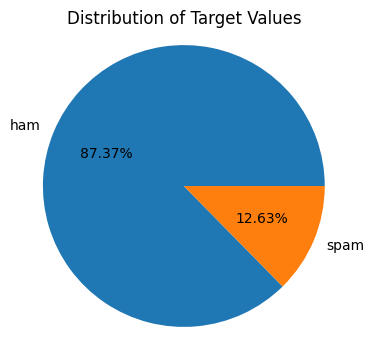

In [18]:
# Create a pie plot using Seaborn
plt.figure(figsize=(4, 4))
labels = ['ham', 'spam']

# Plot the pie chart
plt.pie(value_count, labels=labels, autopct='%1.2f%%')
plt.title('Distribution of Target Values')
plt.axis('equal')

# Show the plot
plt.show()

text column converted into 3 new columns of num_characters,num_words, num_sentences.

In [19]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head(2)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [22]:
# create new column as number of words
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdutp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [26]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Outliers presents

In [27]:
# for Ham
df[df['target']==0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# for Spam
df[df['target']==1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Ham is always smaller than spam comparing of  num_char, num_word & num_sen.

<Axes: xlabel='num_characters', ylabel='Count'>

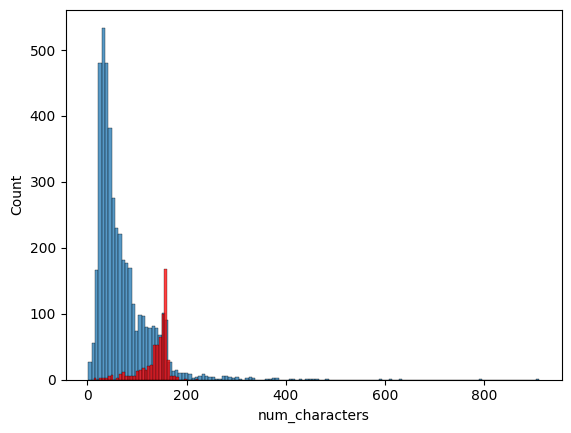

In [29]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

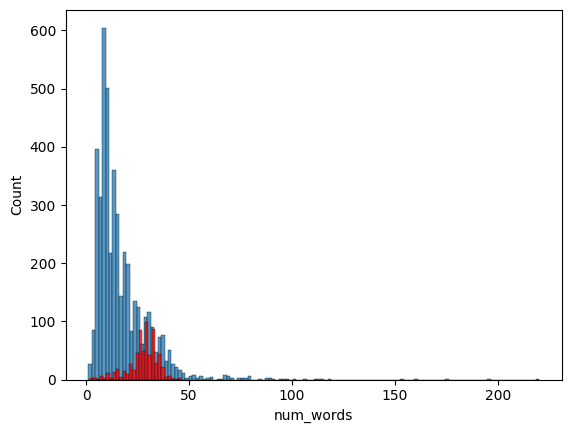

In [30]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

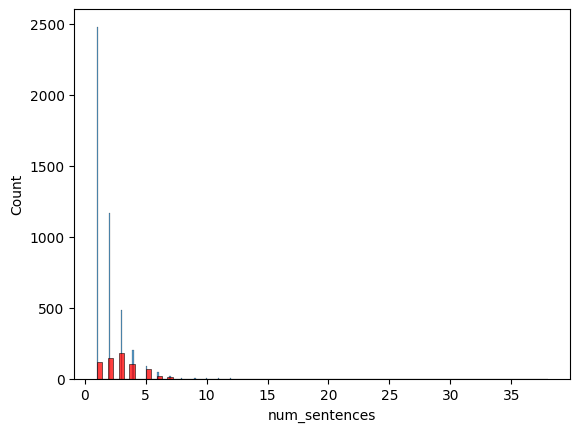

In [31]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='red')

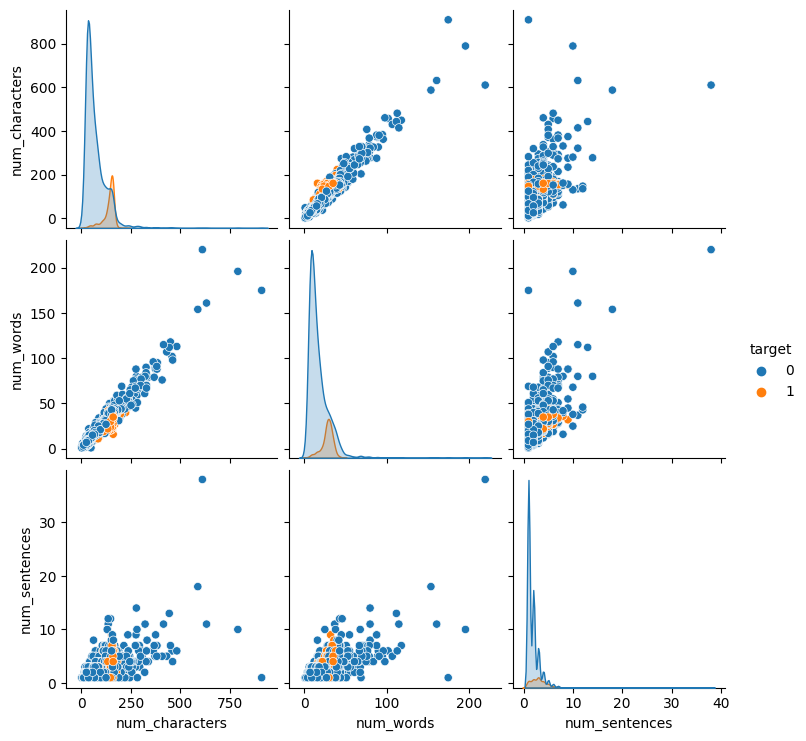

In [32]:
sns.pairplot(df, hue = 'target')

In [33]:
df_corr =df[['target','num_characters', 'num_words','num_sentences']].corr()
df_corr

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

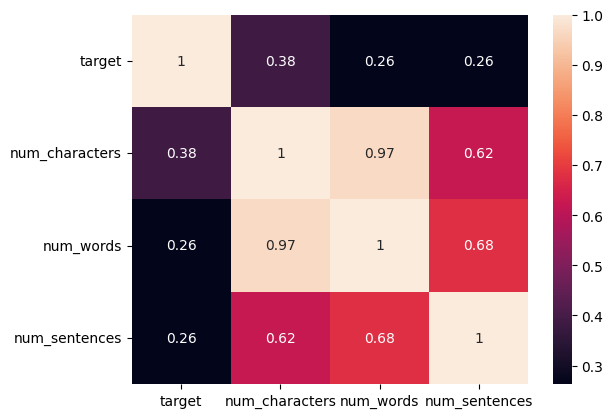

In [34]:
sns.heatmap(df_corr, annot=True)

We have to process num_characters for the next process.

# data Preprocessing on num_characters
1. lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
4. Stemming

In [35]:
# import libraries for doing 5 jobs in one code

import string
string.punctuation

# Download the stopwords dataset
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdutp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def transfer(text):
      text = text.lower()
      text = nltk.word_tokenize(text)

      y = []
      for i in text:
          if i.isalnum():
              y.append(i)

      text = y[:] # list not copied by text = y
      y.clear()

      for i in text:
          if i not in stopwords.words('english') and i not in string.punctuation:
              y.append(i)

      text = y[:]
      y.clear()

      for i in text:
          y.append(ps.stem(i))

      return " ".join(y)

In [37]:
# transfer('HI How $ ARE 20%%')
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [38]:
transfer('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [39]:
df['transformed_text'] = df['text'].apply(transfer)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
# to show the image and find the repeated word import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color ='white')

In [42]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

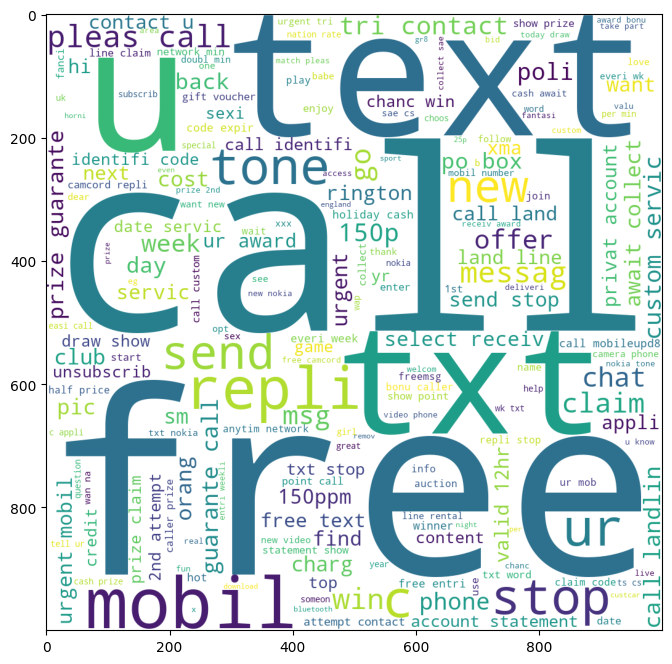

In [43]:
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

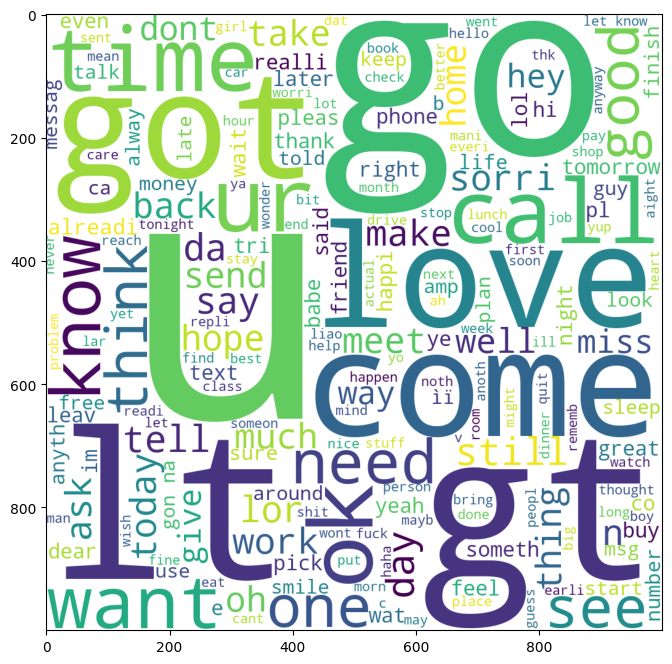

In [45]:
plt.figure(figsize=(8,8))
plt.imshow(ham_wc)

In [46]:
# show the most 30 words its only for learn
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9939

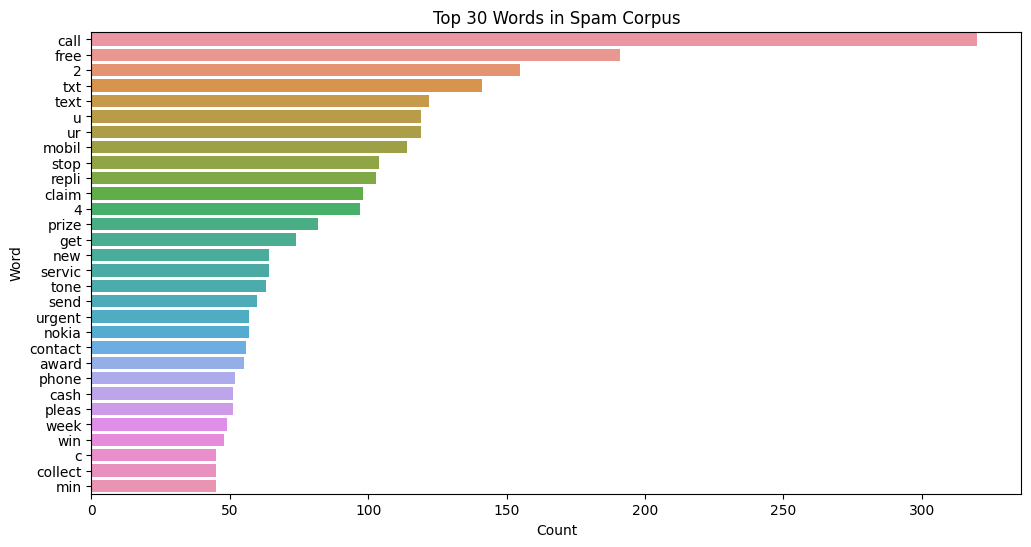

In [48]:
from collections import Counter

# Count the occurrences of each item in 'spam_corpus'
word_counts = Counter(spam_corpus)

# Convert the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a barplot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x='Count', y='Word', data=word_counts_df)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 30 Words in Spam Corpus')

# Display the plot
plt.show()

In [49]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

35404

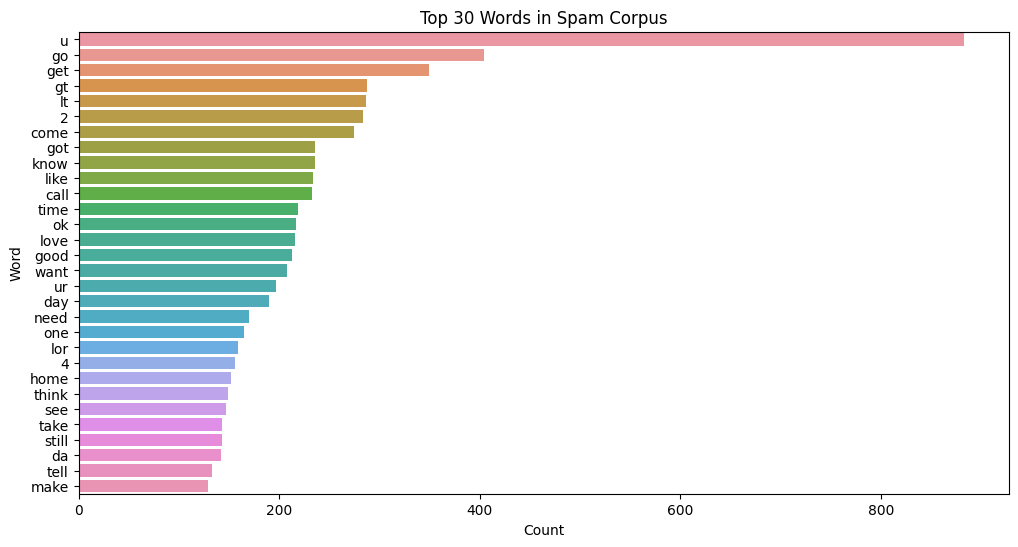

In [51]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each item in 'spam_corpus'
word_counts = Counter(ham_corpus)

# Convert the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a barplot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x='Count', y='Word', data=word_counts_df)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 30 Words in Spam Corpus')

# Display the plot
plt.show()

# Model building
based on Naive for textual data

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 2500)

In [53]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
y = df['target'].values

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 2)

In [56]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# high precision model because false positive want to be reduced

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8568665377176016
[[775 121]
 [ 27 111]]
0.47844827586206895


In [60]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [61]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9845261121856866
[[895   1]
 [ 15 123]]
0.9919354838709677


In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))